In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


ImportError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataFile = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/testDataSorted.csv")
dataFile.head()

,Sector Number,Frequency,Time Interval Avg,total # of blocks
0,753921,90736,0.459198,544416
1,240840,48735,0.886414,292465
2,836706,31787,1.296780,195293
3,837306,31704,1.299350,192217
4,700132,31288,1.156710,247313


In [22]:
def k_means_clustering(column_1, column_2, column_3, clusters, steps=100):
    '''
    Takes in two dataframe columns and outputs plot of clusters.
    '''
    vec_vals = []
    for i in range(len(column_1)):
        a = column_1[i]
        b = column_2[i]
        c = column_3[i]
        if b == 0 :
          b = 41122#max time interval.
        vec_vals.append([a, b, c])
    v_vals = np.array(vec_vals)
    np.random.shuffle(v_vals)    
    with tf.compat.v1.Session() as sess:
      #sess = tf.compat.v1.Session()
      k = clusters
      points = v_vals
      data = tf.constant(points)
      
      # random initial centroids (points shuffled above)
      centroids = tf.Variable(data[:k, :])

      # add k dim to data and n dim to centroids to make matrices compatible
      # for array operations instead of loops
      data_expanded = tf.expand_dims(data, 0)
      centroids_expanded = tf.expand_dims(centroids, 1)

      # computes squared Euclidean distance between every point and every centroid
      # and get closest centroid for each point
      allocations = tf.argmin(tf.reduce_sum(tf.square(data_expanded - centroids_expanded), 2), 0)

      sess.run(tf.compat.v1.global_variables_initializer())
      cidx = 0 # index of centroid
      tf.equal(allocations, cidx)
      tf.gather(data, tf.where(tf.equal(allocations, cidx)))

      means = tf.concat(
          [tf.reduce_mean(
              tf.gather(data,
                        tf.where(tf.equal(allocations, cidx))), 0) for c in range(k)], 0)

      update_centroids = tf.compat.v1.assign(centroids, means)

      for step in range(steps):
          _, centroid_values, allocation_values = sess.run([update_centroids, centroids, allocations])
        
    clusters_df = pd.DataFrame({column_1.name: points[:,0], column_2.name: points[:,1], column_3.name: points[:,2], "cluster": allocation_values})
    return clusters_df

In [28]:
def plot_cluster(col1_name, col2_name, col3_name, clusters_df) :
    #sns.lmplot(col1_name, col2_name, data=clusters_df, fit_reg=False, height=6, hue="cluster")
    #plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = clusters_df[col1_name]
    y = clusters_df[col2_name]
    z = clusters_df[col3_name]

    ax.scatter(x,y,z, marker="s", c=clusters_df["cluster"], s=40, cmap="RdBu")

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


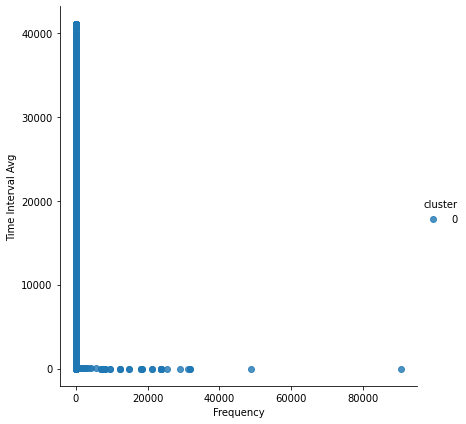

In [24]:
clusters_df = k_means_clustering(dataFile['Frequency'], dataFile['Time Interval Avg'], dataFile['total # of blocks'], 5)

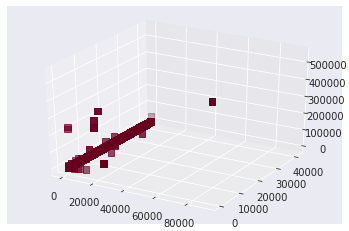

In [29]:
plot_cluster('Frequency', 'Time Interval Avg', 'total # of blocks', clusters_df)